<h1>Initial Data Exploration Notebook Example</h1>

<img style="float: left; margin-right: 15px;" src="../images/posts/2020/iris.jpg" />

# Purpose

Develop a Jupyter Notebook that can be utilized as a template for initial data exploration.

We’ll be utilizing two freely available data sets to illistrate how the notebook works that are commonly used throughout the data science community:

* [The Iris Data Set](http://archive.ics.uci.edu/ml/datasets/Iris/)
* [The IMDB Movie Reviews Set](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

Note that we’ve made two modifications to these data sets:

* For the `Iris Data Set` we’ve added two new records to the set to simulate non-numeric and NaN issues.  You can find our modified version [here]().

* For the `IMDB Movie Reviews Set` we already cleaned and processed the review text, so that we can utilize it directly in the template.  You can find our modified version [here]().


# Load libraries and data

## Libraries

We start by importing the Python libraries we'll need for our initial data exploration:

In [1]:
# Configure the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [58]:
# Load libraries
import numpy as np

import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import DataFrame

from matplotlib import pyplot

from wordcloud import WordCloud, STOPWORDS

import pickle

import nltk
from nltk.probability import FreqDist

import os

## Data

Note we are loading a modified Iris data set and a IMDB Movie Reviews data set.  You can download these files [here]() and [here](), and we assume you've placed the data sets in a directory called `datasets` in the same root folder as this template.

In [3]:
dataFile = os.path.join('.', 'datasets', 'iris.data.csv')
data = read_csv(dataFile, header = 0)

In [4]:
filehandler = open(os.path.join('.', 'datasets', 'reviews.obj'), 'rb') 
reviews = pickle.load(filehandler)

# Helper functions

Next we want to write a quick helper function, `corrTableColors()`.  This function allows us to set rules on when to apply colors to the `correlation` table values which we'll create below.  

Note that you can change the threshold values to better meet your needs if required.  For example, we are highlighting any correlation values greater or less than `0.7`, but these can easily be altered for your project data. 

In [5]:
def corrTableColors(value):
    # Default color
    color = 'black'

    if value == 1:
        color = 'white'
    elif value < -0.7:
        color = 'red'
    elif value > 0.7:
        color = 'green'

    return 'color: %s' % color

# Inspect and visualize the data (Iris Data Set)

Now we are ready for the fun part:  Inspecting the data and learning more about how it is structured!  

We'll utilize the `Iris Data Set` for the steps below, so that we can see how the commands work on an actual data set.

## Non-Visual Exploration

We begin with a non-visual exploration where we examine properties of the data such as the number of records, the data types, descriptive statistics, correlations, etc.

### Shape

The command below will return the number of rows by number of columns which are also refered to as observations and variables:

In [6]:
print("data.shape = ", data.shape)

data.shape =  (152, 5)


Thus we have 150 rows/observations and 5 columns/variables.

### First 10 rows

Using the `head` command we can examine the first 10 records:

In [7]:
print(data.head(10))

  sepalLength  sepalWidth  petalLength  petalWidth        class
0         5.1         3.5          1.4         0.2  Iris-setosa
1         4.9         3.0          1.4         0.2  Iris-setosa
2         4.7         3.2          1.3         0.2  Iris-setosa
3         4.6         3.1          1.5         0.2  Iris-setosa
4         5.0         3.6          1.4         0.2  Iris-setosa
5         5.4         3.9          1.7         0.4  Iris-setosa
6         4.6         3.4          1.4         0.3  Iris-setosa
7         5.0         3.4          1.5         0.2  Iris-setosa
8         4.4         2.9          1.4         0.2  Iris-setosa
9         4.9         3.1          1.5         0.1  Iris-setosa


We can clearly see that the first four columns are numeric data, and the last column appears to be classification labels.  

We aren't sure at this point; however, what the ranges of the numeric data are or how many labels we are dealing with.  We'll explore this later on.

### Data Types

Let's confirm our assumption that the first four columns are numeric.  To do this we examine the output of the `dtypes` command:

In [8]:
print(data.dtypes)

sepalLength     object
sepalWidth     float64
petalLength    float64
petalWidth     float64
class           object
dtype: object


OK, this is interesting!  The `dtypes` command appears to think we have some non-numeric data in the `sepalLength` column, and we know this because it classifies the column as the `object` type.

**Spoiler alert**:  Remember when I said above we are using a modified version of the `Iris Data Set`?  This is the reason:  I intentially placed two problematic records into the data to simulate what might happen if a few slipped through our initial cleaning.  Below we'll take a few basic actions to mitigate this...

If we sort of the data in descending order the non-numeric values should float to the top and give us a better idea of what is occuring:

In [9]:
data['sepalLength'].sort_values(ascending = False).head(5)

151    abc
131    7.9
135    7.7
118    7.7
117    7.7
Name: sepalLength, dtype: object

Ahah!  It appears that record `151` has a typo:  Some one (i.e. me) put the value `abc` into the field instead of an actual numeric value. 

Let's drop the record and recast the column into a numeric data type.  

Note that in this case it is perfectly fine for us to drop the record, because we are working on initial data exploration.  At this point we simply want to get a sense of the story the data is telling us, and so removing a few problematic records shouldn't affect that outcome. 

In [10]:
# Drop the erroneous record; likely a data entry error
data.drop(151, inplace = True)

# Recast the column into numeric values
data['sepalLength'] = pd.to_numeric(data['sepalLength'])

# Confirm our work
print(data.dtypes)

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
class           object
dtype: object


We now see that all the columns are numeric except the last columns which appears to contain classification data.

Another item we should check for is `NULL` values.  Python does not use the `NULL` keyword, and instead uses `NaN` and `None` to represent a `NULL`.

We can quickly check for this as follows:

In [11]:
# isnull() will find both NaN and None values in a dataframe
# Let's see how many we have and count them up
data.isnull().sum()

sepalLength    0
sepalWidth     1
petalLength    0
petalWidth     0
class          0
dtype: int64

It appears we have one NaN/None value in our dataset.  Let's go ahead and drop it, so we can continue with the exploration:

In [30]:
#Drop any NaN/None values from our dataset and then confirm we've removed them all:
data.dropna(inplace = True)

# Confirm our work
data.isna().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
class          0
dtype: int64

As a reminder:  Data cleaning is a whole subject unto itself, and we could write an entire separate article on the matter.  For this writeup; however, we are assuming your data is mostly clean, and we've just covered two basic commands to deal with a few records that might have slipped through.

### Descriptive stats

Next we can take a look at the desciptive statstics for the numeric data in our set:

In [13]:
# Expand the width of the displayed table
set_option('display.width', 200)

# Set the decimal place at two places
set_option('precision', 2)

# Output descriptive statistics
data.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


We can see for example that the `sepalLength` values fluctuate between 4.3 and 7.9, and that the standard deviation (`std`) is relatively small for this data set.  This implies that most of the data is close to the mean, and that we don't have a wide range of values to consider.

We can also note that the numeric values seem to be on similiar scale.  

Note that scale is important, because if you were planning on using an algorithm such as [linear regression](), [neural networks](), [K-means](), etc. as part of your narrative/analysis you'd need to take into scaling into account. 

For example, when dealing with data such as housing you might value such as $450,000 for the house price and the value 3 for the number of bathrooms.  In these cases you'd need to apply `normalization` and/or `standardization` techniques to mitigate the variances between the value scales.  

While these topics are out of scope for this article you can read more about them [here](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) if you want to learn more.

### Class distribution

Let's examine the last column which appeared to be labels for each row.  How many different classes/labels are we dealing with?

In [14]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

We have an even distribution of classes/labels amongst the samples.  

If you were planning on using data modeling this would be important, because you'd have to account for a disparity in the number of classes within the observations if an inbalance existed.

For example, if we have one thousand positive comments and four negative ones, it would be hard to draw convincing conclusions, idenfity trends, or make recommendations on the four negative samples.

### Correlation

Next we examine the data for [correlations](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) using the `corr()` command.  We also utilize the helper function, `corrTableColors()`, we wrote above to make reading the table easier.

As stated before, if you want to change the color thresholds to fit your needs this should be easy to do.

In [15]:
corr = data.corr(method = "pearson")
corr.style.applymap(corrTableColors)

,sepalLength,sepalWidth,petalLength,petalWidth
sepalLength,1.00,-0.11,0.87,0.82
sepalWidth,-0.11,1.00,-0.42,-0.36
petalLength,0.87,-0.42,1.00,0.96
petalWidth,0.82,-0.36,0.96,1.00


Unsurprisingly the data set has one or more positive correlations present, which our intitution would have told us would be the case in data concerning plants. 

In a real world data set this would potentialy provide us areas to investigate further.  For example, assume we had metrics on the number of clicks required to perform some task, and metrics on the time taken for a web page to load.  We could examine the correlation between these two metrics and the reported user satisfaction rating for the system in order to identify potential positive or negative relasionships.

### Skew

[Skewness](https://en.wikipedia.org/wiki/Skewness) is a measure of how long the 'tails' are in the data.  Here is an image to illistrate:

<img style="float: left; margin-right: 15px;" src="../images/posts/2020/skewness.png" />

In this image the 'tail' of the data drifts off to the right, and this is called `positive skewness`.  If on the other hand the tail would have drifted off to the left we would have said the data had `negative skewness`.

Skewness might interest you if you are concerned about data that doesn't follow the [bell curve]() (also known as a `normal distribution`).

For example, let us assume we are examining data from a project concerning customer hold times.  If we saw `positive skewness` in the data we might be concerned, because the long right-side tail would imply some customers are having potentially excessive wait times which in turn could negatively impact customer satisfaction.

Let's see how we can view a numeric representation of skewness for our sample data:

In [16]:
data.skew()

sepalLength    0.31
sepalWidth     0.33
petalLength   -0.27
petalWidth    -0.10
dtype: float64

For a `normal distribution` the skew would be zero.  Our data set has skewness values close to zero, so there does not appear to be any signifigant positive or negative skew.

We'll also be able to visually confirm this in the next section.

## Visualizations

Now that we've finished with the non-visual data exploration let's employ some graphical techniques and see what we find.  :)

### Histograms

Createing histograms for our sample data set is extremely easy as show in the code below:

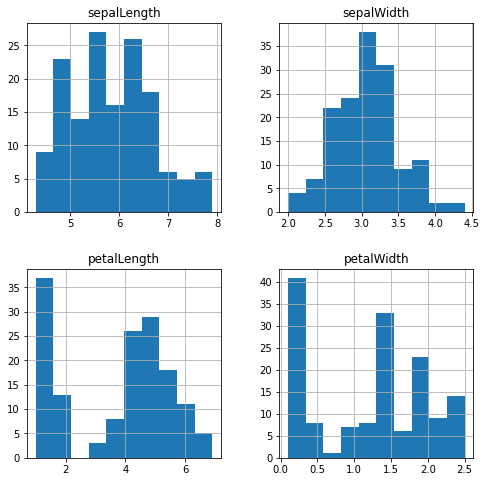

In [17]:
# Control how big the histogram images are
data.hist(figsize = (8,8))

# Draw the histograms
pyplot.show()

The histograms confirm what we learned earlier about `skewness` in the data, and both `sepalLength` and `sepalWidth` appear to normal distributions (i.e. follow the bell curve).  

`petalLength` and `petalWidth` on the other hand appear to be [bimodal](https://www.statology.org/bimodal-distribution/) distritubtions.  Or that is to say they appear to have two 'peaks' in their value distributions.

A `bimodal` (or `multimodal` if there are more than two peaks) might be of interest to you if you were considering scheduling or queue analysis data for example.  

Assume we were working on a project to deploy a online restaurant point of sale (POS) system, and we wanted to ensure the system was responsive during peak hours.  Examining the sales data for the restaurant hour-by-hour would likely reveal a `bimodal` distribution with two peaks:  One at breakfast and another at lunch.

We could use these peaks to calculate the capacity and scalability requirements for the system, recommend on-demand load balancing for the backend POS servers during peak hours, etc.

### Density plots

`Density plots` can be thought of as plots of smoothed histograms.  This assists in examining the 'shape' of the data, and--for me anyhow--are easier to read when considering distribution type and multimodal distribution type.

Let's take a look:

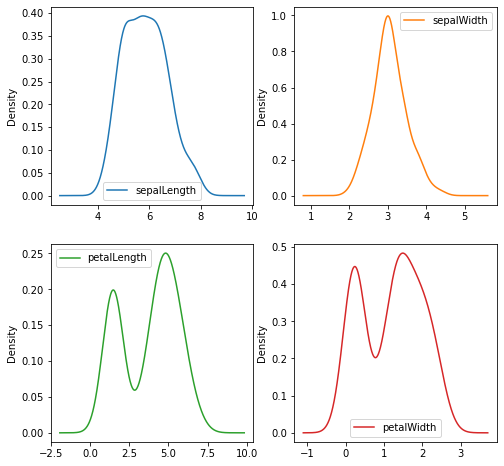

In [72]:
# Create the density plots in a 2x2 layout
data.plot(
    kind = 'density', 
    subplots = True, 
    layout = (2,2), 
    sharex = False, 
    figsize = (8,8)
)

# Draw the plots
pyplot.show()

These plots make it very easy to gauge the distribution of the data as well as the presence of a multimodal distribution.

So for example we can clearly see that the `petalLength` and `sepalWidth` follow a `bell curve`, and that the `petalLength` and `petalWidth` values are indeed `bimodal`.

We also have an additional confirmation regarding the lack of skewness of the data.

### Box and whisker plots

`Box and whisker` plots are fantastic data visualisation tools although they can be unintuitive to decipher at first.  [Here](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/) is a quick two minute article on how to interpret them, and here is an infographic explaining them from that same source:


<img style="float: left; margin-right: 15px;" src="../images/posts/2020/box-and-whisker-plot.png" />

Creating them in our notebook is easy too:

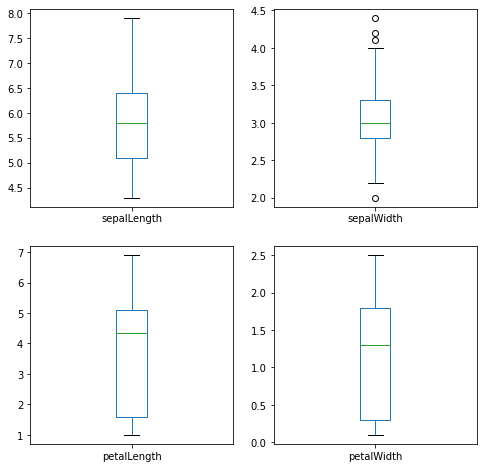

In [19]:
# Create the box-and-whisker plots in a 2x2 layout
data.plot(
    kind="box", 
    subplots = True, 
    layout = (2,2), 
    sharex = False, 
    sharey = False, 
    figsize = (8,8)
)

# Draw the graphs
pyplot.show()

We can note that the box-and-whisker plots contain a lot of information about our dataset in a compact form:

* By examing the Y-axis values and 'whiskers' it is clear the data has a value spread of about 1 to 8 centimeters
* Other than the `sepalWidth` variable the data does not contain outliers 
* The interquartile range (IQR) also appears to have a narrow spread with the greatest amount of variation occuring in the `petalLengh` values
* We can quickly identify the median value for each varaible by examing the value of the green bar.  For example, `sepalWidth` appears to have a median of about 5.75.

### Scatter plot matrix

We next consider a scatter plot matrix, which allows us to visually estimate correlations similiar to how we did this above using quantitiatve means:

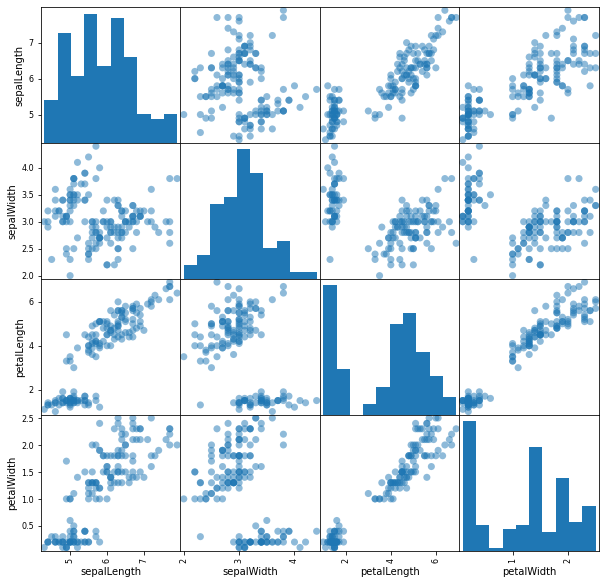

In [20]:
scatter_matrix(data, figsize=(10, 10), s = 200)
pyplot.show()

The scatter plot matrix reinforces visually what we saw above in the correlations table. 

For example, we see that data points for `petalLength` vs. `petalWidth` increase steadly towards the upper right side of the graph in a diagnal line.  If we consult the correlations table we created earlier we find that these two variables are highly correlated at 0.96.

On the other hand if we saw data points on the graph decreasing towards the lower right side of the graph we would know there was negative correlation.

`sepalWidth` and `sepalLength` on the other hand don't seem to have much correlation present since there doesn't appear to be a clear pattern in the plotted data points.  The correlation table confirms with a recorded value of -0.11 for these two variables.

Here is an additional visual explaining these concepts:


<img style="float: left; margin-right: 15px;" src="../images/posts/2020/correlation-graphs.png" />

[Source](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Correlation-Regression/BS704_Correlation-Regression_print.html)

## Unstructured Text

At this point we are staring to have a good initial understanding of what our data looks like.  However, what if we have unstructured data such as customer reviews as part of our collection?

In this section we'll cover three easy techniques to analysize and assess unstructured textual data.

For our example data set we are going to use the `IMDB Movie Reviews` data set we loaded at the beginning of this notebook.

Note that we've already cleaned up the text by removing punctuation and other non-alphabetic values, set all the tex to lower case, removed stop words such as 'a', 'and', 'the', etc., and each review is on a seperate line.

Let's take a quick peek at one of the records we'll be working with:

In [33]:
reviews[110]

'truly dreadful know initially kiwi effort soon started realize characters speaking hardly disguised kiwi accents fake american ones need set n america anyway could set nz actors could used normal voices surely someone production team could hear dreadful attempts speaking american accents bad bad surprised lasted long make seemed like poor attempt segal willis type action man flick total waste money taxpayer money piece trash would leading revolution money put back treasury still reeling get pun reeling absolute garbage seen continue watch well fanatic cant help'

From all the negative words I think it's pretty clear someone didn't like this movie!

### World Clouds

The first technique we'll cover is a word cloud.  

Google says a word cloud is “an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.”

Thus the more often a specific words appears in the text, the bigger and bolder those words will appear in the word cloud.

So for example if we were to utilize a word cloud on a corpus of text related to customer support tickets it might help us to gain an initial understanding of the most common issues.  We might see the word 'slow' or 'missing' occur for a system that had latency and  data errors.

Let's create one from our data, and see what it looks like:

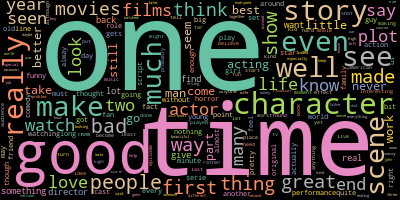

In [66]:
# Generate wordcloud
wordcloud = WordCloud( 
    random_state=1, 
    background_color='black', 
    colormap='Set2', 
    collocations=False, 
    stopwords = STOPWORDS).generate(' '.join(reviews))

wordcloud.to_image()


We can see we get a powerful graphical analysis tool with almost no code!

So the words 'good' and 'time' have the 2nd and 3rd larget font size respectively.  We also see the word 'bad' in the word cloud, but its font size is much smaller.

From this we can form an initial assumption that our sample of movie reviews contains more positive reviews than negative.  Now of course we'd need to empirically validate this with further analysis, but for an initial data exploration it serves the purpose of helping us form a story in our mind of what the data is telling us.

### Numerical Word Frequency Counts

If after creating the word cloud we want to know the exact word count frequencies for words appearing the greatest and least amount of times we can do that like so:

In [67]:
# Count the number of times each word appears in the text(s)
data_analysis = nltk.FreqDist(' '.join(reviews).split())

Now we can view the top 10 most frequent words in the data set:

In [69]:
data_analysis.most_common(10)

[('one', 26788),
 ('like', 20274),
 ('good', 15140),
 ('time', 12724),
 ('even', 12646),
 ('would', 12436),
 ('story', 11983),
 ('really', 11736),
 ('see', 11475),
 ('well', 10662)]

And what if we wanted to know the top 10 least frequent words?

Easy enough:

In [70]:
data_analysis.most_common()[-10:]

[('riiiight', 1),
 ('imy', 1),
 ('jayden', 1),
 ('concider', 1),
 ('acids', 1),
 ('crahan', 1),
 ('substitutions', 1),
 ('daeseleire', 1),
 ('shortsightedness', 1),
 ('unfairness', 1)]

### Sentence Lengths

Next we'll examine the length of each record in our textual data set. 

First let's calculate the number of words per review, and store them in their own column:

In [38]:
reviewsDF = pd.DataFrame(reviews, columns = ['Review Text'])
reviewsDF['Word Count'] = [len(x.split()) for x in reviewsDF['Review Text']]

We can examine how many words are in the first five reviews with the `head()` command:

In [71]:
reviewsDF.head()

,Review Text,Word Count
0,stuff going moment mj started listening music ...,214
1,classic war worlds timothy hines entertaining ...,80
2,starts manager nicholas bell giving welcome in...,238
3,must assumed praised greatest filmed opera eve...,184
4,superbly trashy wondrously unpretentious explo...,208


Next we can use the `describe()` function as we did on the Iris data to create descriptive statitics for the number of words in each review:

In [45]:
reviewsDF['Word Count'].describe()

count    25000.00
mean       116.16
std         89.16
min          3.00
25%         61.00
50%         86.00
75%        141.00
max       1416.00
Name: Word Count, dtype: float64

What is really interesting here is the spread of the values.  The `std` statistic alone gives us an inidication there is a lot of variance at `89.16`, and if we next examine the `min` and `max` entries we see values of `3` and `1,416` respectively.

(For reference 1,416 words is about three pages!)

Clearly we had two individuals with very differnet levels of motiviation when it came to authoring movie reviews...

We can also depict this visually via a histogram:

Text(0, 0.5, 'Number of records')

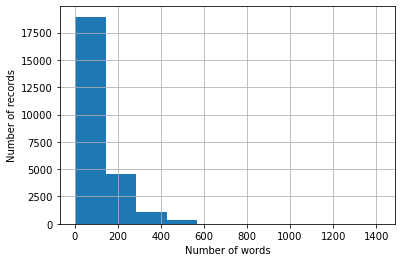

In [52]:
ax = reviewsDF['Word Count'].hist();
ax.set_xlabel("Number of words")
ax.set_ylabel("Number of records")

Whether or not the variance in record length matters will be up to you and your situation.  

For example, if this was unstructured text containing user comments on application performance perhaps I would remove recrods with less than twenty words and more than five hundred.  I might not feel that a record of less than twenty words or more than five hundred would have the concise details I needed to perform a proper root cause analasis.

Again; however, this will be up to you and your domain knowledge of your data.

As a final note, if we wanted to review the the five records with the least amount of words we could do this:

In [56]:
reviewsDF.sort_values(by = ['Word Count'], ascending = True).head()

,Review Text,Word Count
20276,terrible good effects,3
22258,ming merciless little bardwork foul,5
9245,better choose paul verhoeven even watched,6
23558,rent one even dollar rental night,6
4048,adrian pasdar excellent makes fascinating woman,6


This not only gives us the word count for each record, but also the content and the row index where the record can be found in the data set (i.e. the first column).

If you wanted to see the records with the largest number of words you could replace `ascending = True` with `ascending = False` like so:

In [57]:
reviewsDF.sort_values(by = ['Word Count'], ascending = False).head()

,Review Text,Word Count
3485,match tag team table match bubba ray spike dud...,1416
20982,titanic directed james cameron presents fictio...,903
20347,attention spoilers first let say rob roy one b...,892
10503,probably heard bit new disney dub miyazaki cla...,853
6864,praised atlantis lost empire disney adventure ...,805
